My Solution to the Task no 1 for the QOSF Mentorship program

In [33]:
#Import necessary libraries
#This can be run from inside the IBM Quantum Account so I am not adding the API call

from qiskit import QuantumCircuit, Aer, assemble
from qiskit import ClassicalRegister,execute
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.controlledgate import ControlledGate
from qiskit.circuit.gate import Gate
from qiskit.circuit.library import *
from qiskit.circuit.library.standard_gates import XGate
from math import pi


Step 1: Define the input and convert it into binary digits

In [34]:

input_vector=[5,2,10,7] #this is input vector as mentioned in the task no 1 
# Change the values in input_vector it to an arbitraty value with at least two valid nos

#ASSUMPTION 1: As stated in the task document there are at least two numbers which in binary representation have no consecutive same digits
#ASSUMPTION 2: As clarified on the QOSF slack channel, no repeatetion of valid numbers is permitted in the input vector so no vectors like [5,5,4,2]
#Note: The vector of the numbers is of shape [a,b,c,d] as stated in the task document

input_binary=[] #List to store the binary conversion of numbers in the input_vector

for n in input_vector:
    
    input_binary.append((bin(n)[2:].zfill(4)))
    
print(input_binary)


['0101', '0010', '1010', '0111']


Step 2: Build the Quantum Register and Classical registers with enough qubits and classical bits


In [35]:
#Qubits to store the binary numbers
qr0=QuantumRegister(4,'num 0')
qr1=QuantumRegister(4,'num 1')
qr2=QuantumRegister(4,'num 2')
qr3=QuantumRegister(4,'num 3')

#Qubits to route the valid binary number
q_route0=QuantumRegister(1,'route 0')
q_route1=QuantumRegister(1,'route 1')
q_route2=QuantumRegister(1,'route 2')
q_route3=QuantumRegister(1,'route 3')

#Qubits where superposition is going to be achieved
q_output=QuantumRegister(2,'output')

#Classical register just to measure the output
cr_out = ClassicalRegister(2,'out_reg')

#Define quantum circuit
num_reg=QuantumCircuit(qr0,qr1,qr2,qr3,q_route0,q_route1,q_route2,q_route3,q_output,cr_out)


Step 3: Load the numbers in the Quantum Register


In [36]:
input_binary="".join(input_binary) #concatenating all binary num so that we can iterate through them

#Now we need to input the binary values into Quantum Register made for the vector input, if a binary value is 1 then we set that Qubit to 1
for n in range(len(input_binary)):
    if (input_binary[n]=='1'):
        num_reg.x(n)
      
#num_reg.draw()


Step 4: We need to check which of the binary numbers in the num_reg i.e. qr0,qr1,qr2,qr3 satisfy the condition on non repeative consecutive 1s and 0s


In [28]:
#It can be easily seen that only two binary number i.e. 0101=5 and 1010=10 satify this condition 
#so I devise a custom controlled gate to detect if 0101 or 1010 occurs in any of the quantum registers

#This controlled x gate detects 0101
c4x_gate5 = XGate().control(4,ctrl_state='0101')

#This controlled x gate detects 1010
c4x_gate10 = XGate().control(4,ctrl_state='1010')

#This controlled x gate detects if 0101 is present on qr0 i.e first number is = 5
num_reg.append(c4x_gate5, [qr0[0],qr0[1],qr0[2],qr0[3], q_route0] )

#This controlled x detects if 0101 is present on qr0 i.e first number is = 10
num_reg.append(c4x_gate10, [qr0[0],qr0[1],qr0[2],qr0[3], q_route0] )

#we need to do this for second number
#This controlled x gate detects if 0101 is present on qr1 i.e number is = 5
num_reg.append(c4x_gate5, [qr1[0],qr1[1],qr1[2],qr1[3], q_route1] )

#This controlled x detects if 0101 is present on qr1 i.e number is = 10
num_reg.append(c4x_gate10, [qr1[0],qr1[1],qr1[2],qr1[3], q_route1] )

#we need to do this for third number
#This controlled x gate detects if 0101 is present on qr2 i.e number is = 5
num_reg.append(c4x_gate5, [qr2[0],qr2[1],qr2[2],qr2[3], q_route2] )

#This controlled x detects if 0101 is present on qr2 i.e number is = 10
num_reg.append(c4x_gate10, [qr2[0],qr2[1],qr2[2],qr2[3], q_route2] )

#we need to do this for last number
#This controlled x gate detects if 0101 is present on qr3 i.e number is = 5
num_reg.append(c4x_gate5, [qr3[0],qr3[1],qr3[2],qr3[3], q_route3] )

#This controlled x detects if 0101 is present on qr3 i.e number is = 10
num_reg.append(c4x_gate10, [qr3[0],qr3[1],qr3[2],qr3[3], q_route3] )

#num_reg.draw()

Step 5: We need to generate customized superposition of a two qubit system 


In [29]:
#num_reg[20] i.e. q_output[0] and num_reg[21] i.e. q_output[1] are the output
#q_route0,q_route1 q_route2 q_route3 are control qubits

#case 1 |00>+|01> q_route0 and q_route1 are 1
#Additional CCX gate are to satisfy other cases

num_reg.ry(pi/4,q_output[0])
num_reg.ccx(q_route0,q_route1,q_output[0])  
num_reg.ccx(q_route0,q_route3,q_output[0]) #Additional CCX gate is to satisfy case 3
num_reg.ccx(q_route1,q_route2,q_output[0]) #Additional CCX gate is to satisfy case 4
num_reg.ccx(q_route2,q_route3,q_output[0]) #Additional CCX gate is to satisfy case 5
num_reg.ry(-pi/4,q_output[0])

#case 2 |00>+|10> q_route0 and q_route2 are 1
#Additional CCX gate are to satisfy other cases

num_reg.ry(pi/4,q_output[1])
num_reg.ccx(q_route0,q_route2,q_output[1])
num_reg.ccx(q_route1,q_route3,q_output[1]) #This CCX gate is to satisfy case 6
num_reg.ry(-pi/4,q_output[1])

#case 3 |00>+|11> q_route0 and q_route3 are 1
c3x_gate111 = XGate().control(3,ctrl_state='111')
num_reg.append(c3x_gate111, [q_route0,q_route3,q_output[0],q_output[1]]) #Entanglement

#case 4 |01>+|10> q_route1 and q_route2 are 1
#c3x_gate111 = XGate().control(3,ctrl_state='111')
num_reg.append(c3x_gate111, [q_route1,q_route2,q_output[0],q_output[1]]) #Entanglement
num_reg.ccx(q_route1,q_route2,q_output[1])                               #Entanglement

#case 5 |01>+|11> q_route1 and q_route3 are 1
num_reg.ccx(q_route1,q_route3,q_output[0])

#case 5 |10>+|11> q_route2 and q_route3 are 1
num_reg.ccx(q_route2,q_route3,q_output[1])

Step 6: Add measurement 

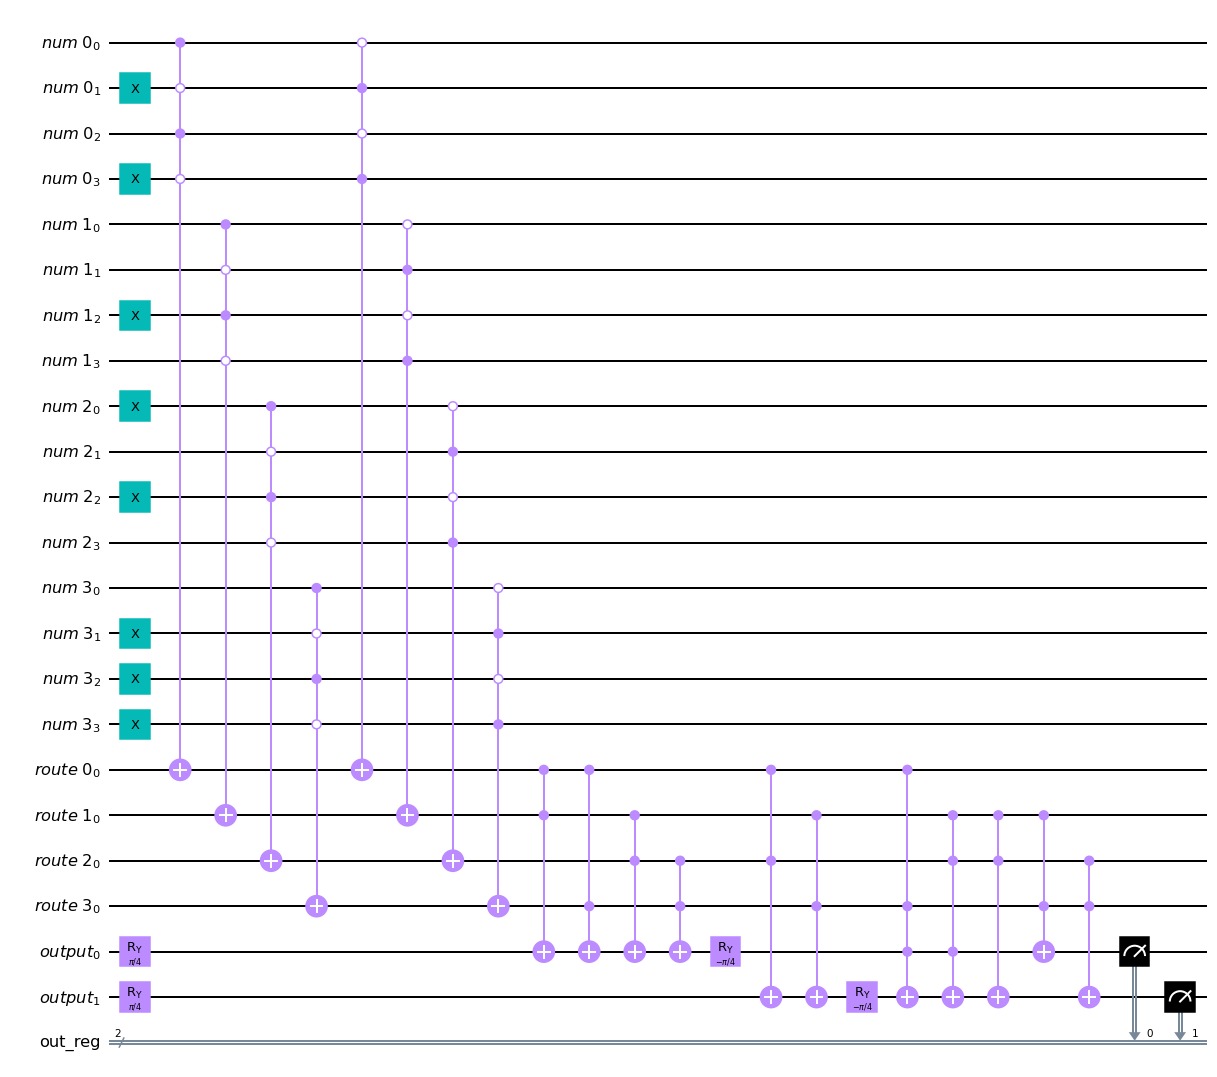

In [30]:
#measurement
num_reg.measure(q_output[0], cr_out[0])
num_reg.measure(q_output[1], cr_out[1])

num_reg.draw()
#draw the circuit

Simulation and Outcome

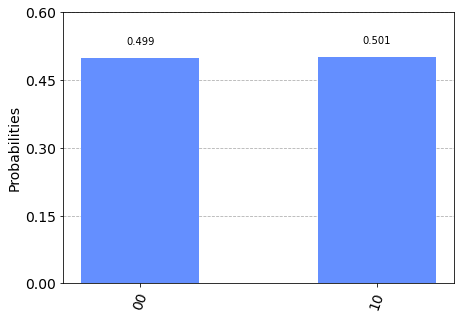

In [31]:
aer_sim = Aer.get_backend('qasm_simulator')
shots = 1024
# qobj = assemble(num_reg, aer_sim)
results = execute(num_reg, aer_sim).result()
answer = results.get_counts()

plot_histogram(answer)
#Please note that the MSB is the outermost bit in the graph

Thanks for your kind attention, This is Ashish K S Arya email: ashishk1@hotmail.com